In [1]:
import sys

sys.path.append("../") 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rc
from conformal import utils

### Load Data

In [2]:
global_plot_args = {"xlabel": "Prob Experts",
             "title": "CIFAR-10 OvA",
             "fig_path": "gradual_overlap_ova_{}.pdf"}
accuracies_dict = utils.load_dict_txt("metrics.txt")
accuracies_dict = {k: np.array(v) for k,v in accuracies_dict.items()}

In [3]:
methods = ['standard', 'voting', 'random', 'last', 'ensemble']

In [8]:
import matplotlib.pyplot as plt

import seaborn as sns

from tueplots import bundles
from tueplots import figsizes, fonts, axes, fontsizes, markers

# === OLD FIGURE OPTIONS === #
# # Latex Options === #
# rc('font', family='serif')
# rc('text', usetex=True)

# # Matplotlib Options === #
# cm = sns.color_palette("deep")
# global_plot_args = {"marker": "o",
#                     "markeredgecolor": "k",
#                     "markersize": 10,
#                     "linewidth": 8
#                     }
# sns.set_context("notebook", font_scale=1.3)
# fig_size = (7, 7)

# ============================ #
# === AISTATS 2023 OPTIONS === #
# ============================ #
# === Seaborn Color ===
sns.set_palette(sns.color_palette("tab10"))
# sns.set_palette(sns.color_palette("deep"))
# sns.set_palette(sns.color_palette("colorblind"))

# === TUEPLOTS CONFIG ===
# Increase resolution ===
plt.rcParams.update({"figure.dpi": 150})
# Load bundle ===
# plt.rcParams.update(bundles.aistats2023())

# Update figsize ===
# full =
# plt.rcParams.update(figsizes.aistats2023_full())
# half =
plt.rcParams.update(figsizes.aistats2023_half(constrained_layout=False,
                                              tight_layout=True,
                                              height_to_width_ratio=1))  # make square fig.

# FONT ===
# Update font
# font family =
plt.rcParams.update(fonts.aistats2022_tex(family="serif"))
# font size =
plt.rcParams.update(fontsizes.aistats2023(default_smaller=0))
# custom fontsize
# plt.rcParams.update({"font.size": 10})

# AXES ===
plt.rcParams.update(axes.lines(base_width=1,
                               line_base_ratio=4))  # increase base_width for thicker lines
plt.rcParams.update(axes.grid(grid_alpha=0.5))  # custom grid. alpha=0-1, for transparency
# plt.rcParams.update(axes.lines())  # increase base_width for thicker lines

# OTHERS ===
# Markers
# plt.rcParams.update(markers.with_edge())
# Error bars capsize
plt.rcParams.update({"errorbar.capsize": 2})
plt.rcParams.update(markers.with_edge())


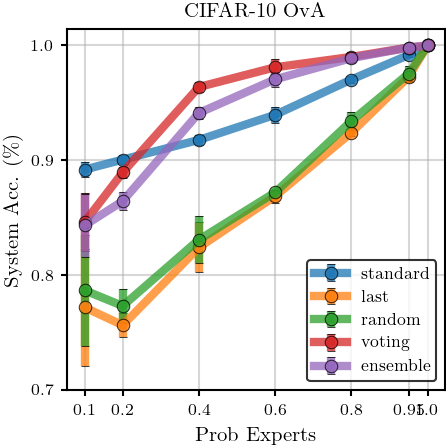

In [9]:

exp_list = [0.1,0.2,0.4,0.6,0.8,0.95,1.0]
f, ax = plt.subplots(1, 1)
for i, (method, acc_np) in enumerate(accuracies_dict.items()):
    method_acc_mean = acc_np.mean(axis=0)
    method_acc_std = acc_np.std(axis=0)
    label = r"{}"
    # ax.plot(exp_list, method_acc_mean, "-", label=label.format(method), alpha=0.5)
    plt.errorbar(exp_list, method_acc_mean, yerr=method_acc_std,
                 alpha=0.75,label=label.format(method), marker="o")
    
plt.xticks(exp_list, exp_list)
plt.yticks(list(plt.yticks()[0])[::2])
plt.ylabel(r'System Acc. ($\%$)')
plt.xlabel(r'{}'.format(global_plot_args["xlabel"]))
plt.title(r'{}'.format(global_plot_args["title"]))
plt.legend(loc="best")
plt.grid()
f.set_tight_layout(True)
plt.legend()
plt.savefig("sys_acc_ova_gradual_overlap.pdf")

In [52]:
# sns.pointplot(data=accuracies_dict["standard"], capsize=0.1)
# sns.pointplot(data=accuracies_dict["voting"], capsize=0.1)
# sns.pointplot(data=accuracies_dict["ensemble"], capsize=0.1)
# sns.pointplot(data=accuracies_dict["random"],  capsize=0.1)
# plt.grid()

### Example

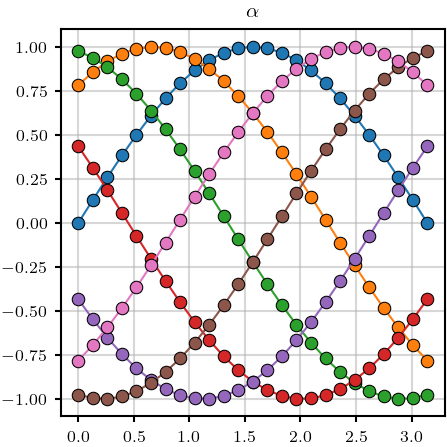

In [10]:
x = np.linspace(0, np.pi, 25)
offsets = np.linspace(0, 2 * np.pi, 7, endpoint=False)
yy = [np.sin(x + phi) for phi in offsets]
fig, ax = plt.subplots()
for y in yy:
    ax.plot(x, y, "o-", linewidth=1)
plt.grid()
plt.title(r"$\alpha$")
plt.show()
fig.savefig("test.pdf")